# PERFORMING PRINCIPAL COMPONENT ANALYSIS ON ASTEROID DATA

<p>AASHISH UPADHYAY</p>
<p>AUTHOR , AI TECH SYSTEMS</p>
<a href=https://ai-techsystems.com>AI TECH SYSTEMS</a>
<p>e-mail : aashish31f@gmail.com</p>

In [135]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sea
sea.set()

In [169]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 24,
        }

In [2]:
# IMPORTING DATASET
dataset = pd.read_csv("nasa.csv")

In [3]:
dataset.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [4]:
dataset.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [18]:
# REMOVING SOME LESS IMPORTANT FEATURES LIKE 'Neo Reference ID', 'Name', 'Equinox', 'Orbit Determination Date', 'Close Approach Date' , 'Orbiting Body' , 'Orbit ID'

x = dataset.iloc[:,[2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]].values
y = dataset.iloc[:,-1].values

In [34]:
x.shape

(4687, 32)

In [35]:
y.shape

(4687,)

### THE LOGISTIC REGRESSION FUNCTION

In [163]:
# MODEL TRAINING

def log_reg(x_pass,y_pass,learning_rate=0.5,epochs=3000,print_cost=True):
    x = x_pass.T
    y = y_pass.reshape(1,x.shape[1])
    m = x.shape[1]
    w = np.zeros((x.shape[0],1))
    b = 0.0
    for i in range(epochs+1):
        z = np.dot(w.T,x)+b
        a = 1/(1+np.exp(-1*z))
        loss = -np.mean((y*np.log(a))+((1-y)*np.log(1-a)))
        dz = a-y
        dw = (1/m)*np.dot(x,dz.T)
        db = np.mean(dz)
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        if print_cost==True:
            if i%400==0:
                print("epoch",i,"  cost :",loss)
    return w,b   

In [130]:
# PREDICTING VALUES

def predict(x_pass,w,b):
    x = x_pass.T
    z = np.dot(w.T,x)+b
    a = np.zeros(x.shape[1])
    sigmoid = 1/(1+np.exp(-1*z))
    for i in range(x.shape[1]):
        if sigmoid[0,i]>=0.5:
            a[i]=1
        elif sigmoid[0,i]<0.5:
            a[i]=0
    return a
        
    

### NORMALIZING THE DATASET

In [51]:
def normalize(x_pass):
    mean = np.mean(x_pass,axis=0).reshape(1,x_pass.shape[1])
    x = x_pass - mean
    x_std = np.std(x,axis=0).reshape(1,x_pass.shape[1])
    x_norm = x/x_std
    return x_norm    

### APPLYING PCA 

In [171]:
def pca(x_pass,n_comp=None):
    x_norm = normalize(x_pass)
    cov = (1/x_pass.shape[1])*(x_norm.T).dot(x_norm)
    u,s,v = np.linalg.svd(cov)
    if n_comp==None:
        pres_var = np.cumsum(s)/np.sum(s)
        for i in range(1,x_pass.shape[1]):
            print("for",i,"components information preserved is :",pres_var[i-1]*100,"%")
            plt.figure(num=2,figsize=(18,13.5))
            plt.scatter(i,pres_var[i]*100)
            plt.annotate(str(i),(i,pres_var[i]*100))
        plt.xlabel('no. of components',fontdict=font)
        plt.ylabel("% of preserved information",fontdict=font)
        plt.show()
    else:
        x_red = (u[:,:n_comp].T).dot(x_norm.T).T
        return x_red   

### APPLYING LOGISTIC REGRESSION TO ORIGINAL FEATURES

In [58]:
x_norm = normalize(x)                             # mean normalizing dataset

In [109]:
# Splitting datset into training and test sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm ,y ,test_size=0.25 ,random_state=5)

In [136]:
tic = time.time()
w,b = log_reg(x_train,y_train,learning_rate=0.3,epochs=16000)
toc = time.time()
train_time = toc - tic
print("the training time is :",train_time)

epoch 0   cost : 0.6931471805599454
epoch 400   cost : 0.15719381071487445
epoch 800   cost : 0.1340609287824133
epoch 1200   cost : 0.12371088706192476
epoch 1600   cost : 0.11770509224177896
epoch 2000   cost : 0.11376397264563516
epoch 2400   cost : 0.11098191757636612
epoch 2800   cost : 0.10892010336514292
epoch 3200   cost : 0.10733779177872937
epoch 3600   cost : 0.1060910913693676
epoch 4000   cost : 0.10508839803487761
epoch 4400   cost : 0.10426849896821626
epoch 4800   cost : 0.10358888593195968
epoch 5200   cost : 0.10301910148702471
epoch 5600   cost : 0.10253674859956054
epoch 6000   cost : 0.10212499287506455
epoch 6400   cost : 0.10177094195001248
epoch 6800   cost : 0.10146456136996312
epoch 7200   cost : 0.10119792999123269
epoch 7600   cost : 0.1009647166963955
epoch 8000   cost : 0.10075980514254167
epoch 8400   cost : 0.10057901980553337
epoch 8800   cost : 0.10041892275545125
epoch 9200   cost : 0.10027666072286918
epoch 9600   cost : 0.10014984850979422
epoch 100

In [137]:
y_pred = predict(x_test,w,b)

In [138]:
# Computing the accuracy of the model

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[1][0]+cm[0][1])
print("the accuracy is :",accuracy)

the accuracy is : 0.9496587030716723


#### FOR ORIGINAL DATASET :

- TRAINING TIME : 21.33051371574402 s 
- ACCURACY      : 94.96587030716723 %

### APPLYING LOGISTIC REGRESSION TO PRINCIPAL COMPONENTS

for 1 components information preserved is : 31.157393578536798 %
for 2 components information preserved is : 48.807922965336004 %
for 3 components information preserved is : 61.7658150515288 %
for 4 components information preserved is : 71.12839170550475 %
for 5 components information preserved is : 77.06430665149496 %
for 6 components information preserved is : 81.00980371343763 %
for 7 components information preserved is : 84.3781490999543 %
for 8 components information preserved is : 87.57935425259407 %
for 9 components information preserved is : 90.62325350145363 %
for 10 components information preserved is : 93.61176244511944 %
for 11 components information preserved is : 96.0476400824742 %
for 12 components information preserved is : 97.79608757943822 %
for 13 components information preserved is : 98.6964690795885 %
for 14 components information preserved is : 99.31719141905354 %
for 15 components information preserved is : 99.83859230846248 %
for 16 components information preser

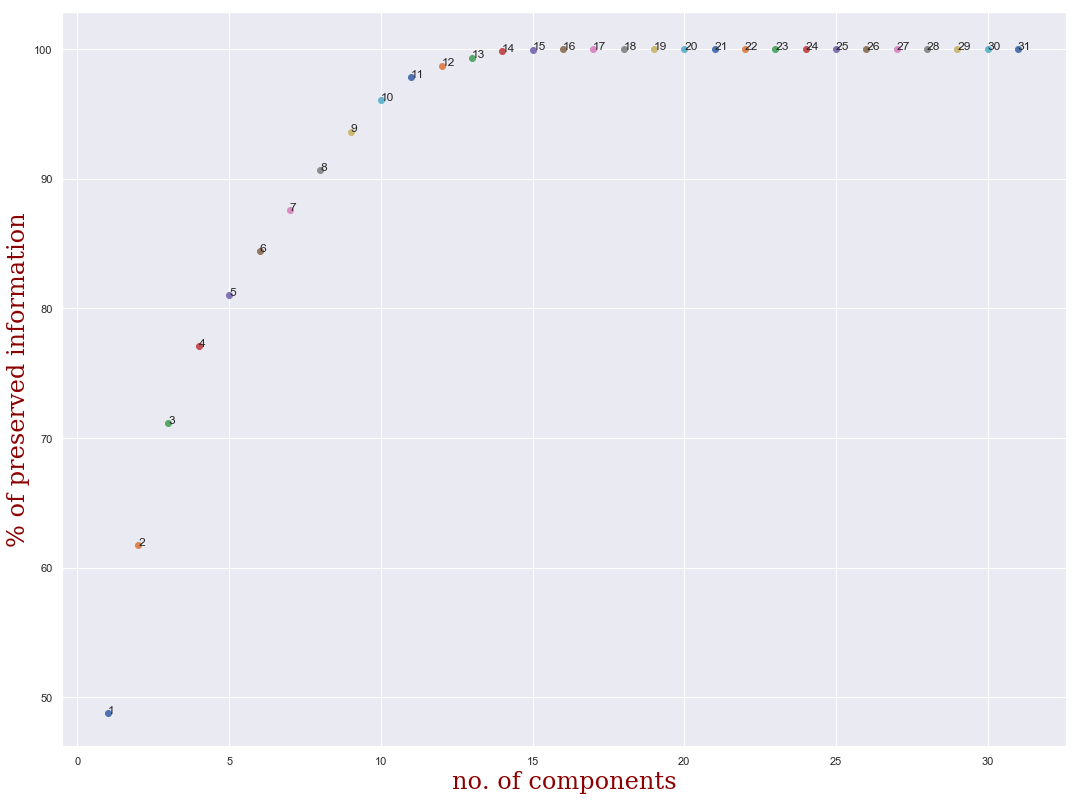

In [172]:
pca(x)                              # CHECKING THE PRESERVED INFORMATION ON NO. OF COMPONENTS

for 1 components accuracy of model is : 82.33788395904436 %
for 2 components accuracy of model is : 82.16723549488054 %
for 3 components accuracy of model is : 82.08191126279864 %
for 4 components accuracy of model is : 82.5938566552901 %
for 5 components accuracy of model is : 82.5085324232082 %
for 6 components accuracy of model is : 82.42320819112628 %
for 7 components accuracy of model is : 83.53242320819113 %
for 8 components accuracy of model is : 83.53242320819113 %
for 9 components accuracy of model is : 83.44709897610922 %
for 10 components accuracy of model is : 83.3617747440273 %
for 11 components accuracy of model is : 83.3617747440273 %
for 12 components accuracy of model is : 88.31058020477815 %
for 13 components accuracy of model is : 92.4061433447099 %
for 14 components accuracy of model is : 94.19795221843003 %
for 15 components accuracy of model is : 95.05119453924915 %
for 16 components accuracy of model is : 95.05119453924915 %
for 17 components accuracy of model is

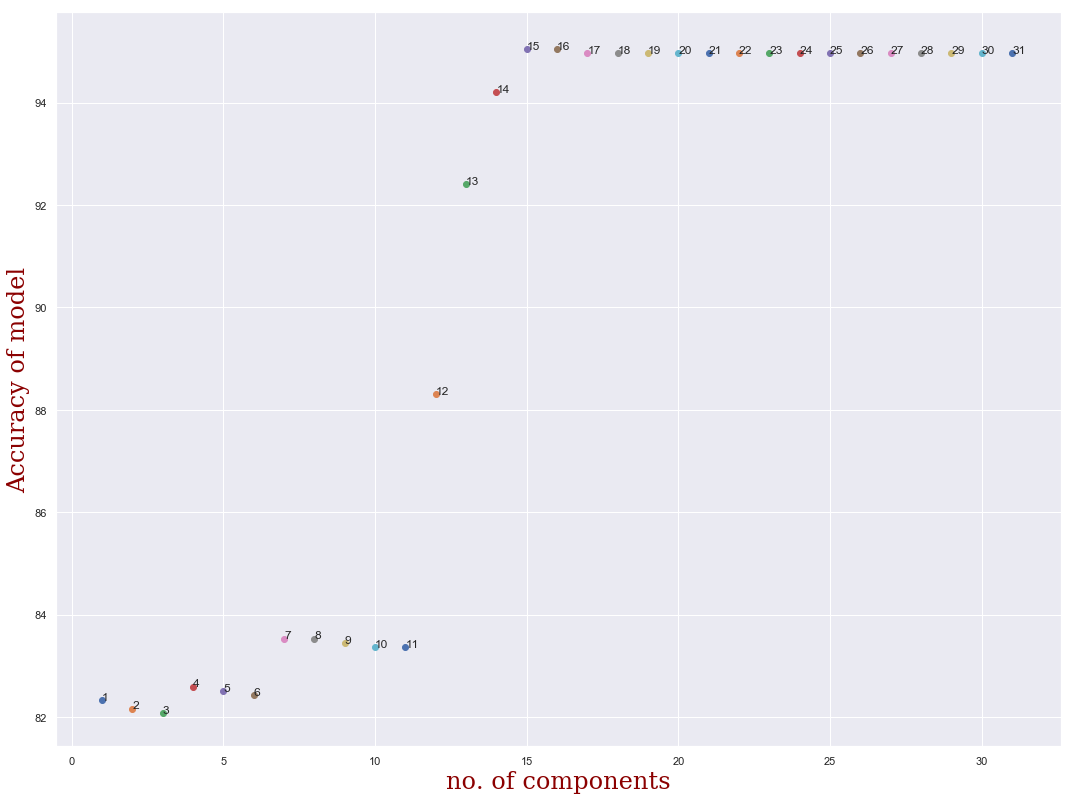

In [170]:
# CHECKING THE ACCURACY OF MODEL ON NO. OF PRINCIPAL COMPONENTS

for i in range(1,32):
    x_red = pca(x,i)
    x_red_train , x_red_test , y_train , y_test = train_test_split(x_red,y,test_size=0.25,random_state=5)
    w_red , b_red = log_reg(x_red_train,y_train,learning_rate=0.3,epochs=16000,print_cost=False)
    y_red_pred = predict(x_red_test,w_red,b_red)
    cm_red = confusion_matrix(y_test,y_red_pred)
    acc = (cm_red[0][0]+cm_red[1][1])/(cm_red[0][0]+cm_red[1][1]+cm_red[1][0]+cm_red[0][1])
    print("for",i,"components accuracy of model is :",acc*100,"%")
    plt.figure(num=2,figsize=(18,13.5))
    plt.scatter(i,acc*100)
    plt.annotate(str(i),(i,acc*100))
plt.xlabel("no. of components",fontdict=font)
plt.ylabel("Accuracy of model",fontdict=font)
plt.show()

In [173]:
# EVALUATING TRAINING TIME FOR MODELS WITH DIFFERENT NO. OF PRINCIPAL COMPONENTS

for i in range(1,32):
    x_red = pca(x,i)
    x_red_train , x_red_test , y_train , y_test = train_test_split(x_red,y,test_size=0.25,random_state=5)
    tice = time.time()
    w_red , b_red = log_reg(x_red_train,y_train,learning_rate=0.3,epochs=16000,print_cost=False)
    toce = time.time()
    training_time = toce-tice 
    print("for",i,"components training time of model is :",training_time,"s")

for 1 components training time of model is : 6.705126047134399 s
for 2 components training time of model is : 8.108497381210327 s
for 3 components training time of model is : 7.677842617034912 s
for 4 components training time of model is : 5.588250398635864 s
for 5 components training time of model is : 5.87372088432312 s
for 6 components training time of model is : 6.239620208740234 s
for 7 components training time of model is : 6.905743598937988 s
for 8 components training time of model is : 6.571740627288818 s
for 9 components training time of model is : 7.004460573196411 s
for 10 components training time of model is : 6.752665281295776 s
for 11 components training time of model is : 7.062261581420898 s
for 12 components training time of model is : 7.254809617996216 s
for 13 components training time of model is : 7.442986011505127 s
for 14 components training time of model is : 7.929995536804199 s
for 15 components training time of model is : 8.768172979354858 s
for 16 components tr

#### 90% INFORMATION PRESERVATION
- NO. OF PRINCIPAL COMPONENTS REQUIRED : 9
- ACCURACY OF THE MODEL : 83.44709897610922 %
- TRAINING TIME : 7.004460573196411 s

#### 50% INFORMATION PRESERVATION
- NO. OF PRINCIPAL COMPONENTS REQUIRED : 3
- ACCURACY OF THE MODEL : 82.08191126279864 %
- TRAINING TIME : 7.677842617034912 s

### MAX ACCURACY(95.05119453924915 %) IS ACHIEVED WHEN NO. OF PRINCIPAL COMPONENTS IS : 15